In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (199 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!sudo apt install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,663 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import os
from easyocr import Reader
reader = Reader(["en"])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
import os
from pdf2image import convert_from_path

BASE_PDF_DIR = '/content/drive/MyDrive/Data Visualization/Files'
BASE_IMG_DIR = '/content/drive/MyDrive/Data Visualization/Images'
pdfs = os.listdir(BASE_PDF_DIR)

for pdf in pdfs:
  print(f'{BASE_PDF_DIR}/{pdf}')
  images = convert_from_path(f'{BASE_PDF_DIR}/{pdf}')

  for i in range(len(images)):
      images[i].save(BASE_IMG_DIR + '/' + pdf.rsplit('.')[0] +'.jpg', 'JPEG')

/content/drive/MyDrive/Data Visualization/Files/docsumo_data_182.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_120.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_108.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_124.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_56.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_154.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_81.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_170.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_151.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_155.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_35.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_95.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_102.pdf
/content/drive/MyDrive/Data Visualization/Files/docsumo_data_180.pdf
/content/drive/MyDrive/Data Visualizat

In [ ]:
BASE_IMG_DIR = '/content/drive/MyDrive/Data Visualization/Images'
images = os.listdir(BASE_IMG_DIR)

In [ ]:
filenames = []
texts = []

In [ ]:
from tqdm import tqdm
for image in tqdm(images):
  text = ""
  im = Image.open(f'{BASE_IMG_DIR}/{image}')
  results = reader.readtext(im)
  text = " ".join([results[i][1] for i in range(len(results))])
  filenames.append(image)
  texts.append(text)

100%|██████████| 185/185 [17:13<00:00,  5.59s/it]


In [ ]:
import pandas as pd
df = pd.DataFrame({"filename": filenames, "text": texts})

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Visualization/texts.csv", index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Visualization/texts.csv")

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove generic words
stops = ["instructions", "lines", "year", "form", "box", "number", "column", "line", "total"]

In [ ]:
for stop in stops:
  nlp.Defaults.stop_words.add(stop)

In [ ]:
def clean_abstract(text):
  text = re.sub('[^a-z\s]', ' ', text.lower())
  text = [i.lower() for i in text.split() if i not in nlp.Defaults.stop_words]
  text = ' '.join(text)
  text.replace('\n',' ')
  return text

In [ ]:
df['text'] = df['text'].apply(clean_abstract)

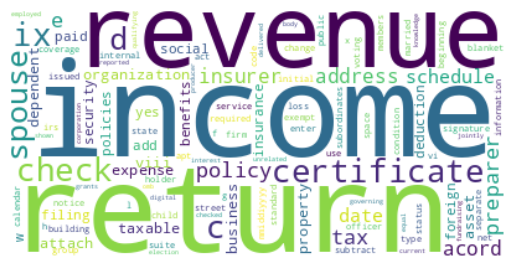

In [ ]:
text = " ".join(t for t in df.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter
from nltk.util import ngrams
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [ ]:
df_total = documentNgrams(df['text'], 2)

In [ ]:
df_total

,words,count
97,c c,150
135,members governing,150
136,governing body,150
137,body vi,150
204,ix d,150
132,net assets,150
203,expenses ix,150
179,add equal,150
535,married filing,150
148,unrelated business,150


In [ ]:
df_a = pd.read_csv("/content/drive/MyDrive/Data Visualization/texts.csv")

In [ ]:
def lower(text):
  text = re.sub('[^a-z\s]', ' ', text.lower())
  text = [i.lower() for i in text.split()]
  text = ' '.join(text)
  text.replace('\n',' ')
  return text

In [ ]:
df_a['text'] = df_a['text'].apply(lower)

In [ ]:
doc_types = []

In [ ]:
for text in df_a['text']:
  if "return of organization" in text:
    doc_types.append("Form 990")
  elif "individual income tax return" in text:
    doc_types.append("Form 1040")
  elif "acord" in text:
    doc_types.append("acord")
  else:
    doc_types.append("unknown")

In [ ]:
doc_types

['Form 990',
 'acord',
 'Form 1040',
 'Form 1040',
 'acord',
 'acord',
 'acord',
 'Form 1040',
 'Form 990',
 'Form 990',
 'acord',
 'acord',
 'acord',
 'Form 990',
 'acord',
 'Form 990',
 'acord',
 'Form 990',
 'Form 990',
 'Form 990',
 'acord',
 'Form 990',
 'acord',
 'Form 990',
 'Form 990',
 'acord',
 'acord',
 'Form 1040',
 'acord',
 'Form 990',
 'acord',
 'Form 1040',
 'acord',
 'acord',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 1040',
 'acord',
 'Form 1040',
 'Form 1040',
 'Form 1040',
 'acord',
 'Form 990',
 'acord',
 'acord',
 'acord',
 'Form 990',
 'Form 1040',
 'Form 990',
 'Form 990',
 'Form 1040',
 'Form 990',
 'Form 1040',
 'Form 1040',
 'acord',
 'acord',
 'Form 990',
 'Form 1040',
 'Form 990',
 'acord',
 'acord',
 'Form 1040',
 'Form 990',
 'Form 990',
 'Form 1040',
 'Form 990',
 'Form 990',
 'Form 990',
 'Form 1040',
 'Form 990',
 'Form 1040',
 'Form 990',
 'acord',
 'Form 1040',
 'Form 990',
 'acord',
 'Form 1040'

In [ ]:
df['type'] = doc_types

In [ ]:
df['type'].unique()

array(['Form 990', 'acord', 'Form 1040'], dtype=object)

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Visualization/docs_nums.csv")

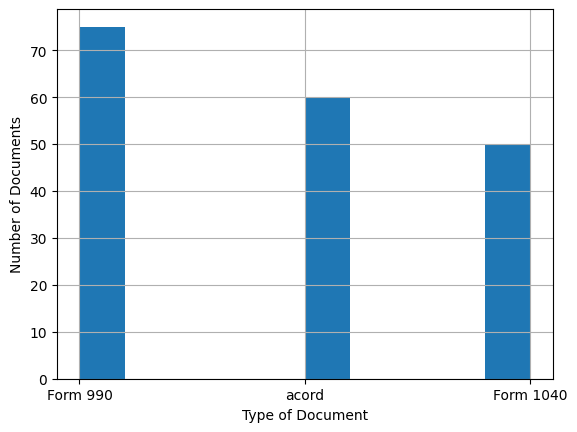

In [ ]:
df['type'].hist()
plt.xlabel("Type of Document")
plt.ylabel("Number of Documents")
plt.show()

In [ ]:
df

,filename,text,type
0,docsumo_data_182.jpg,return organization exempt income tax omb sect...,Form 990
1,docsumo_data_120.jpg,date mmiddiyyyy acord certificate property ins...,acord
2,docsumo_data_108.jpg,department treasury internal revenue service u...,Form 1040
3,docsumo_data_124.jpg,department treasury internal revenue service u...,Form 1040
4,docsumo_data_56.jpg,date mmiddiyyyy acord certificate property ins...,acord
...,...,...,...
180,docsumo_data_8.jpg,return organization exempt income tax omb sect...,Form 990
181,docsumo_data_174.jpg,department treasury internal revenue service u...,Form 1040
182,docsumo_data_119.jpg,date mmiddiyyyy acord certificate property ins...,acord
183,docsumo_data_117.jpg,date mmiddiyyyy acord certificate property ins...,acord


In [ ]:
df['text'][0].split()

['return',
 'organization',
 'exempt',
 'income',
 'tax',
 'omb',
 'section',
 'c',
 'internal',
 'revenue',
 'code',
 'private',
 'foundations',
 'department',
 'treasury',
 'enter',
 'social',
 'security',
 'numbers',
 'public',
 'open',
 'public',
 'internal',
 'revenue',
 'service',
 'www',
 'irs',
 'govlform',
 'latest',
 'information',
 'inspection',
 'calendar',
 'tax',
 'beginning',
 'ending',
 'check',
 'applicable',
 'c',
 'organization',
 'banker',
 'd',
 'employer',
 'identification',
 'address',
 'change',
 'business',
 'change',
 'street',
 'p',
 'o',
 'mail',
 'delivered',
 'street',
 'address',
 'room',
 'suite',
 'e',
 'telephone',
 'initial',
 'return',
 'mckinney',
 'harbor',
 'final',
 'return',
 'terminated',
 'town',
 'state',
 'province',
 'country',
 'zip',
 'foreign',
 'postal',
 'code',
 'amended',
 'return',
 'bradleyport',
 'g',
 'gross',
 'receipts',
 'application',
 'pending',
 'f',
 'address',
 'principal',
 'officer',
 'h',
 'group',
 'return',
 'subordi

In [ ]:
text = " ".join(text for text in df["text"])

In [ ]:
text

'return organization exempt income tax omb section c internal revenue code private foundations department treasury enter social security numbers public open public internal revenue service www irs govlform latest information inspection calendar tax beginning ending check applicable c organization banker d employer identification address change business change street p o mail delivered street address room suite e telephone initial return mckinney harbor final return terminated town state province country zip foreign postal code amended return bradleyport g gross receipts application pending f address principal officer h group return subordinates yes mckinney harbor h subordinates included yes tax exempt status c c insert attach list website http ilqjwgrtifbi hlc group exemption organization corporation trust association formation m state legal domicile massach summary briefly describe organization mission significant activities mckinney harbor l check organization discontinued operation